In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [7]:
print(df.head())


         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [21]:
print(df.describe())

         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [24]:
print(df.columns)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


In [25]:
# 2. Convert 'date' column to datetime
# Replace 'date' with the correct column name if different
df['date'] = pd.to_datetime(df['date'])

KeyError: 'date'

In [26]:
# Generate a fake date range starting from a specific date
df['date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
# 3. Check for missing values
print(df.isnull().sum())

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
date            0
dtype: int64


In [30]:
# Fill missing values with forward fill method
df.fillna(method='ffill', inplace=True)

<ipython-input-30-05e1cf13b561>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [31]:
# 4. Set date as index for time series plotting
df.set_index('date', inplace=True)

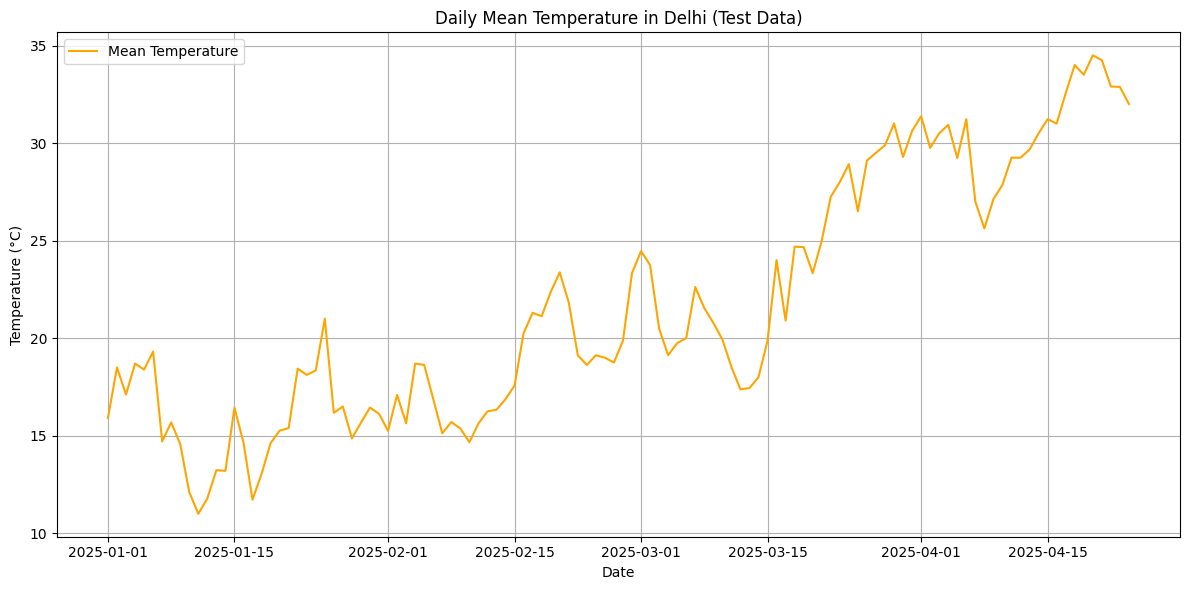

In [38]:
plt.figure(figsize=(12,6))
plt.plot(df['meantemp'], label='Mean Temperature', color='orange')
plt.title('Daily Mean Temperature in Delhi (Test Data)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

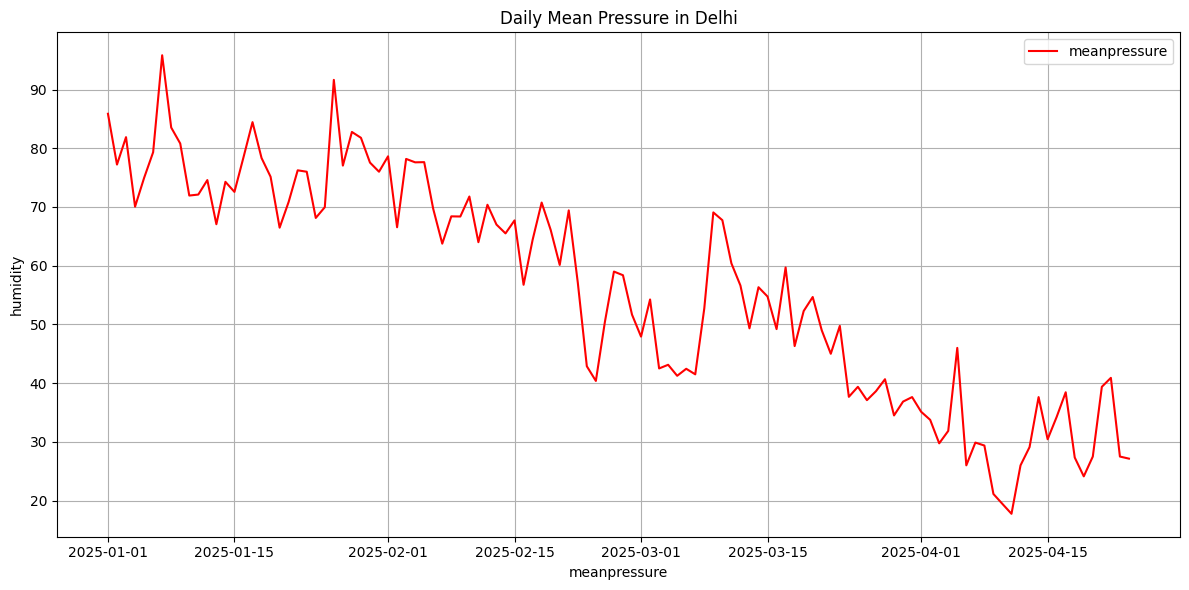

In [37]:
# 5. Plotting pressure trend
plt.figure(figsize=(12,6))
plt.plot(df['humidity'], label='meanpressure', color='red')
plt.title('Daily Mean Pressure in Delhi')
plt.xlabel('meanpressure')
plt.ylabel('humidity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

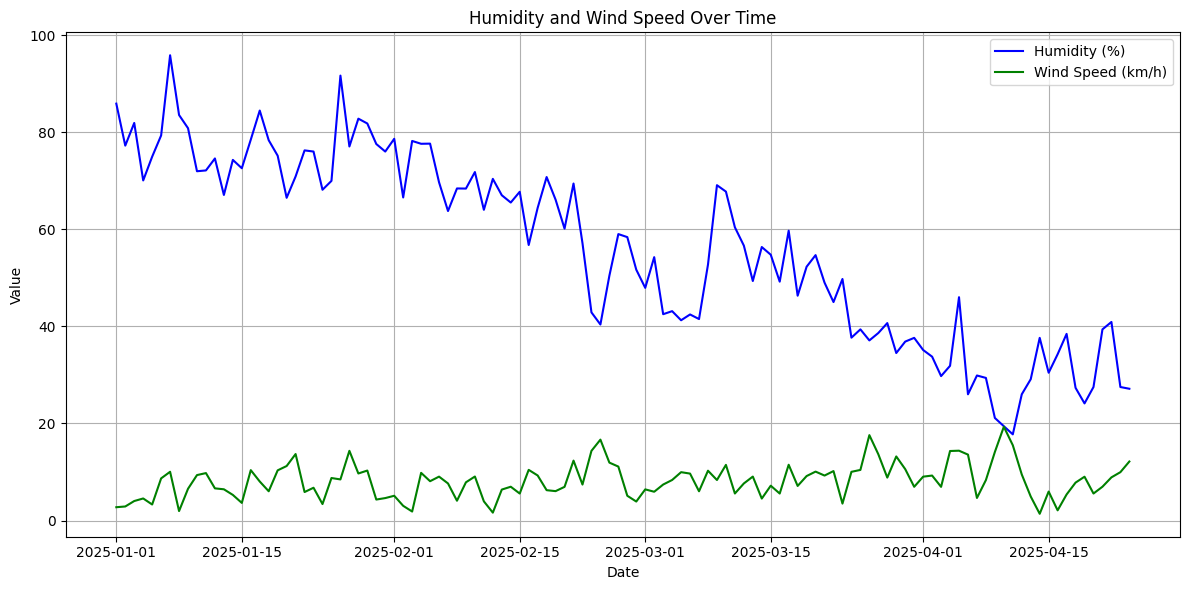

In [33]:
# 6. Plotting humidity and wind speed
plt.figure(figsize=(12,6))
plt.plot(df['humidity'], label='Humidity (%)', color='blue')
plt.plot(df['wind_speed'], label='Wind Speed (km/h)', color='green')
plt.title('Humidity and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()